In [91]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
import matplotlib.pyplot as plt

### MLP Model

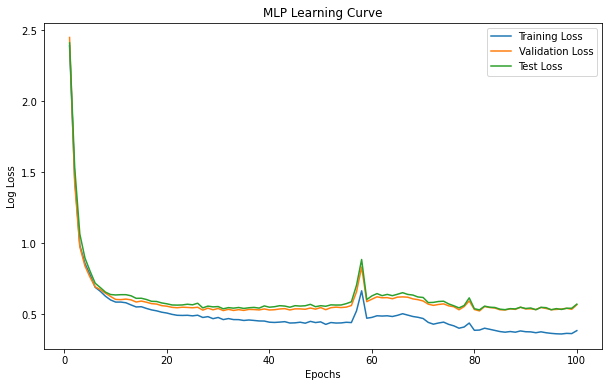

Training Error: 0.17
Cross-Validation Error: 0.25
Test Error: 0.25


In [92]:
icu_data = pd.read_csv("train1_icu_data.csv")
icu_labels = pd.read_csv("train1_icu_label.csv").values.ravel()

icu_test_new = pd.read_csv("test1_icu_data.csv")
icu_testL_new = pd.read_csv("test1_icu_label.csv").values.ravel()

X_train, X_val, y_train, y_val = train_test_split(icu_data, icu_labels, test_size=0.2, random_state=42)

mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
train_losses, val_losses, test_losses = [], [], []

for epoch in range(1, 101):
    mlp_classifier.partial_fit(X_train, y_train, classes=[0, 1])
    train_losses.append(log_loss(y_train, mlp_classifier.predict_proba(X_train)))
    val_losses.append(log_loss(y_val, mlp_classifier.predict_proba(X_val)))
    test_loss = log_loss(icu_testL_new, mlp_classifier.predict_proba(icu_test_new))
    test_losses.append(test_loss)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), train_losses, label='Training Loss')
plt.plot(range(1, 101), val_losses, label='Validation Loss')
plt.plot(range(1, 101), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('MLP Learning Curve')
plt.legend()
plt.show()

training_error = 1 - accuracy_score(y_train, mlp_classifier.predict(X_train))
validation_error = 1 - accuracy_score(y_val, mlp_classifier.predict(X_val))

print(f"Training Error: {training_error:.2f}")
print(f"Cross-Validation Error: {validation_error:.2f}")

test_error = 1 - accuracy_score(icu_testL_new, mlp_classifier.predict(icu_test_new))
print(f"Test Error: {test_error:.2f}")


### With different numbers of hidden layers

Hidden Layers: (25,)
Training Error: 0.21
Cross-Validation Error: 0.23


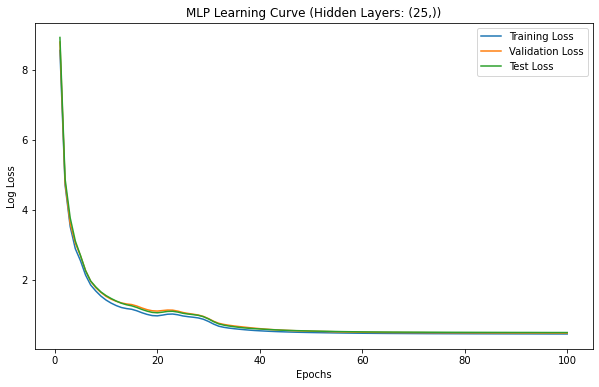

Test Error: 0.23
---------------------------------------------------------------------------------
Hidden Layers: (50,)
Training Error: 0.24
Cross-Validation Error: 0.27


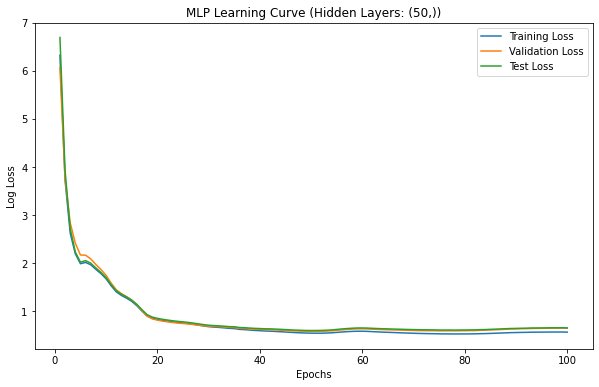

Test Error: 0.28
---------------------------------------------------------------------------------
Hidden Layers: (100,)
Training Error: 0.19
Cross-Validation Error: 0.24


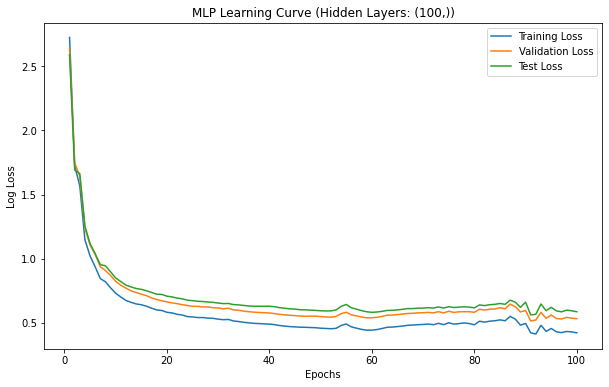

Test Error: 0.26
---------------------------------------------------------------------------------
Hidden Layers: (100, 50)
Training Error: 0.17
Cross-Validation Error: 0.25


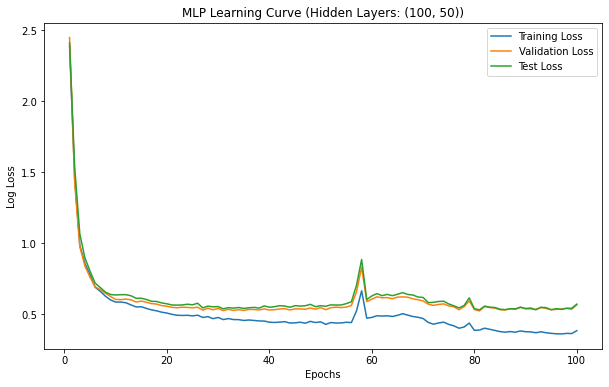

Test Error: 0.25
---------------------------------------------------------------------------------
Hidden Layers: (100, 50, 25)
Training Error: 0.15
Cross-Validation Error: 0.23


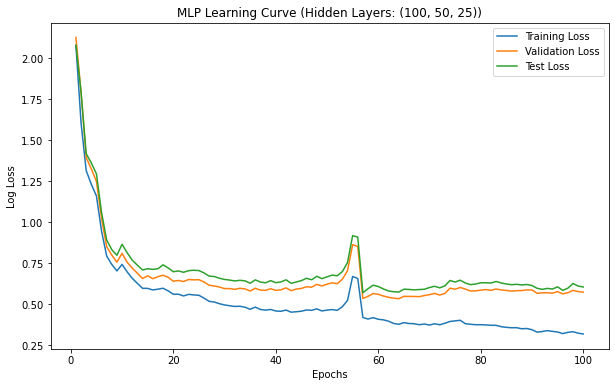

Test Error: 0.25
---------------------------------------------------------------------------------


In [93]:
hidden_layers_configs = [(25,), (50,), (100,), (100, 50), (100, 50, 25)]

for hidden_layers in hidden_layers_configs:
    mlp_classifier = MLPClassifier(hidden_layer_sizes=hidden_layers, max_iter=1000, random_state=42)
    train_losses, val_losses, test_losses = [], [], []

    for epoch in range(1, 101):
        mlp_classifier.partial_fit(X_train, y_train, classes=[0, 1])
        train_losses.append(log_loss(y_train, mlp_classifier.predict_proba(X_train)))
        val_losses.append(log_loss(y_val, mlp_classifier.predict_proba(X_val)))
        test_loss = log_loss(icu_testL_new, mlp_classifier.predict_proba(icu_test_new))
        test_losses.append(test_loss)
        

    training_error = 1 - accuracy_score(y_train, mlp_classifier.predict(X_train))
    validation_error = 1 - accuracy_score(y_val, mlp_classifier.predict(X_val))

    print(f"Hidden Layers: {hidden_layers}")
    print(f"Training Error: {training_error:.2f}")
    print(f"Cross-Validation Error: {validation_error:.2f}")

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 101), train_losses, label='Training Loss')
    plt.plot(range(1, 101), val_losses, label='Validation Loss')
    plt.plot(range(1, 101), test_losses, label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Log Loss')
    plt.title(f'MLP Learning Curve (Hidden Layers: {hidden_layers})')
    plt.legend()
    plt.show()
    
    test_error = 1 - accuracy_score(icu_testL_new, mlp_classifier.predict(icu_test_new))
    print(f"Test Error: {test_error:.2f}")
    print("---------------------------------------------------------------------------------")


### Hyperparameter Tuning

Best Learning Rate: 0.01
Training Error: 0.48
Best Validation Error: 0.38


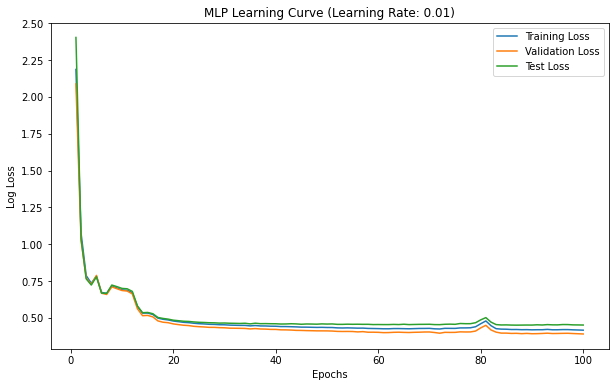

Test Error: 0.21


In [94]:
learning_rates = [0.001, 0.01, 0.1, 0.5]

best_model = None
best_learning_rate = None
best_validation_error = float("inf")

for lr in learning_rates:
    mlp_classifier = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, learning_rate_init=lr, random_state=42)
    mlp_classifier.partial_fit(X_train, y_train, classes=[0, 1])
    validation_error = 1 - accuracy_score(y_val, mlp_classifier.predict(X_val))

    if validation_error < best_validation_error:
        best_model = mlp_classifier
        best_learning_rate = lr
        best_validation_error = validation_error

training_error = 1 - accuracy_score(y_train, mlp_classifier.predict(X_train))

print(f"Best Learning Rate: {best_learning_rate}")
print(f"Training Error: {training_error:.2f}")
print(f"Best Validation Error: {best_validation_error:.2f}")

train_losses, val_losses, test_losses = [], [], []

for epoch in range(1, 101):
    best_model.partial_fit(icu_data, icu_labels, classes=[0, 1])
    train_losses.append(log_loss(icu_labels, best_model.predict_proba(icu_data)))
    val_losses.append(log_loss(y_val, best_model.predict_proba(X_val)))
    test_loss = log_loss(icu_testL_new, best_model.predict_proba(icu_test_new)[:, 1])
    test_losses.append(test_loss)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), train_losses, label='Training Loss')
plt.plot(range(1, 101), val_losses, label='Validation Loss')
plt.plot(range(1, 101), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title(f'MLP Learning Curve (Learning Rate: {best_learning_rate})')
plt.legend()
plt.show()

test_error = 1 - accuracy_score(icu_testL_new, best_model.predict(icu_test_new))
print(f"Test Error: {test_error:.2f}")


### Different Activation Functions

Activation Function: identity
Training Error: 0.26
Cross-Validation Error: 0.26


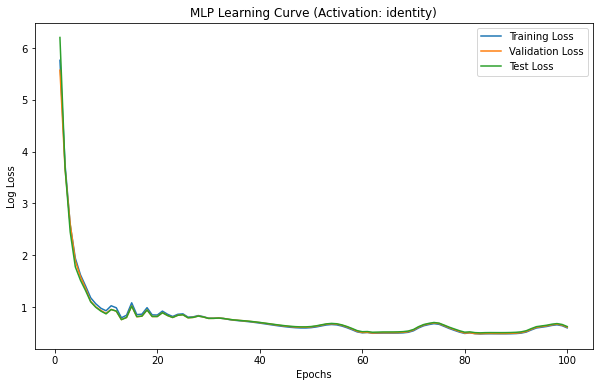

Test Error: 0.26
---------------------------------------------------------------------------------
Activation Function: logistic
Training Error: 0.20
Cross-Validation Error: 0.22


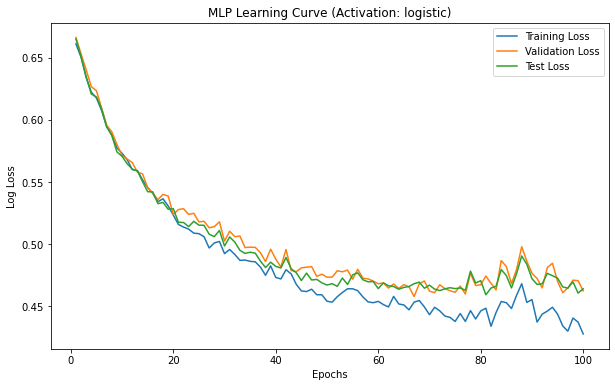

Test Error: 0.23
---------------------------------------------------------------------------------
Activation Function: tanh
Training Error: 0.25
Cross-Validation Error: 0.26


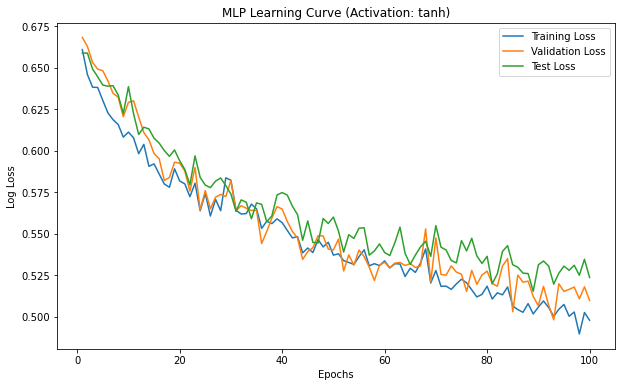

Test Error: 0.27
---------------------------------------------------------------------------------
Activation Function: relu
Training Error: 0.24
Cross-Validation Error: 0.27


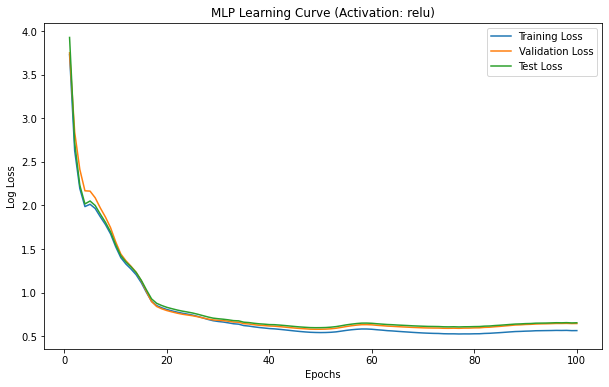

Test Error: 0.28
---------------------------------------------------------------------------------


In [95]:
activation_functions = ['identity', 'logistic', 'tanh', 'relu']

for activation in activation_functions:
    mlp_classifier = MLPClassifier(hidden_layer_sizes=(50), max_iter=1000, activation=activation, random_state=42)
    mlp_classifier.partial_fit(X_train, y_train, classes=[0, 1])
    
    train_losses, val_losses, test_losses = [], [], []
    for epoch in range(1, 101):
        mlp_classifier.partial_fit(X_train, y_train, classes=[0, 1])
        train_losses.append(log_loss(y_train, mlp_classifier.predict_proba(X_train)))
        val_losses.append(log_loss(y_val, mlp_classifier.predict_proba(X_val)))
        test_loss = log_loss(icu_testL_new, mlp_classifier.predict_proba(icu_test_new))
        test_losses.append(test_loss)

    training_error = 1 - accuracy_score(y_train, mlp_classifier.predict(X_train))
    validation_error = 1 - accuracy_score(y_val, mlp_classifier.predict(X_val))

    print(f"Activation Function: {activation}")
    print(f"Training Error: {training_error:.2f}")
    print(f"Cross-Validation Error: {validation_error:.2f}")

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 101), train_losses, label='Training Loss')
    plt.plot(range(1, 101), val_losses, label='Validation Loss')
    plt.plot(range(1, 101), test_losses, label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Log Loss')
    plt.title(f'MLP Learning Curve (Activation: {activation})')
    plt.legend()
    plt.show()
    
    test_error = 1 - accuracy_score(icu_testL_new, mlp_classifier.predict(icu_test_new))
    print(f"Test Error: {test_error:.2f}")
    
    print("---------------------------------------------------------------------------------")


### Mini-Batch Size

Mini-Batch Size: 32
Training Error: 0.36
Cross-Validation Error: 0.38


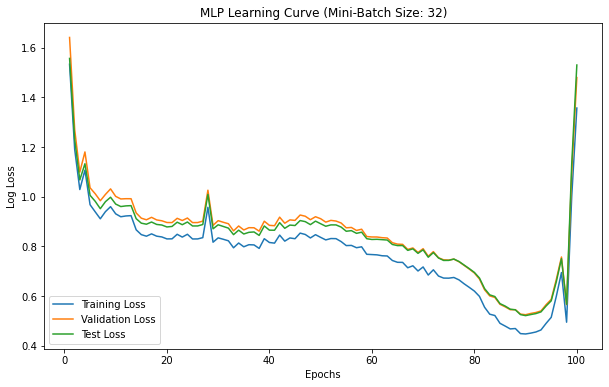

Test Error: 0.38
---------------------------------------------------------------------------------
Mini-Batch Size: 64
Training Error: 0.23
Cross-Validation Error: 0.26


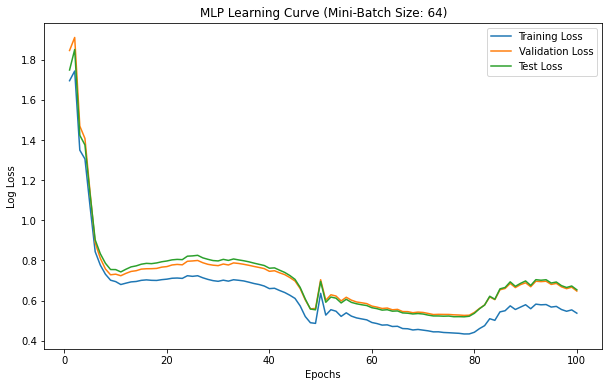

Test Error: 0.28
---------------------------------------------------------------------------------
Mini-Batch Size: 128
Training Error: 0.20
Cross-Validation Error: 0.22


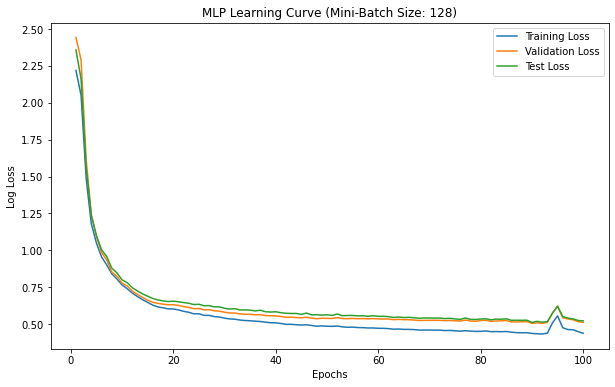

Test Error: 0.23
---------------------------------------------------------------------------------


In [96]:
batch_sizes = [32, 64, 128]

for batch_size in batch_sizes:
    X_train, X_val, y_train, y_val = train_test_split(icu_data, icu_labels, test_size=0.2, random_state=42)

    mlp_classifier = MLPClassifier(hidden_layer_sizes=(50), max_iter=1000, batch_size=batch_size, random_state=42)
    mlp_classifier.partial_fit(X_train, y_train, classes=[0, 1])

    train_losses, val_losses, test_losses = [], [], []
    for epoch in range(1, 101):
        mlp_classifier.partial_fit(X_train, y_train, classes=[0, 1])
        train_losses.append(log_loss(y_train, mlp_classifier.predict_proba(X_train)))
        val_losses.append(log_loss(y_val, mlp_classifier.predict_proba(X_val)))
        test_loss = log_loss(icu_testL_new, mlp_classifier.predict_proba(icu_test_new))
        test_losses.append(test_loss)

    training_error = 1 - accuracy_score(y_train, mlp_classifier.predict(X_train))
    validation_error = 1 - accuracy_score(y_val, mlp_classifier.predict(X_val))

    print(f"Mini-Batch Size: {batch_size}")
    print(f"Training Error: {training_error:.2f}")
    print(f"Cross-Validation Error: {validation_error:.2f}")

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 101), train_losses, label='Training Loss')
    plt.plot(range(1, 101), val_losses, label='Validation Loss')
    plt.plot(range(1, 101), test_losses, label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Log Loss')
    plt.title(f'MLP Learning Curve (Mini-Batch Size: {batch_size})')
    plt.legend()
    plt.show()

    test_error = 1 - accuracy_score(icu_testL_new, mlp_classifier.predict(icu_test_new))
    print(f"Test Error: {test_error:.2f}")

    print("---------------------------------------------------------------------------------")